<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [15]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [17]:
# Read CSV
house_csv = "../../data/Sacramento_transactions.csv"

In [18]:
df=pd.read_csv("Sacramento_transactions.csv")


In [19]:
df.shape

(985, 12)

In [20]:
df.head(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [21]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [33]:
#Removing the "0" from the min valve of the df
df.drop(df.index[df['sq__ft'] == 0], inplace=True)

In [34]:
df.isnull().sum() # Checking if there are any NaN in any of the columns in dataset seems there are none.

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     814 non-null    object 
 1   city       814 non-null    object 
 2   zip        814 non-null    int64  
 3   state      814 non-null    object 
 4   beds       814 non-null    int64  
 5   baths      814 non-null    int64  
 6   sq__ft     814 non-null    int64  
 7   type       814 non-null    object 
 8   sale_date  814 non-null    object 
 9   price      814 non-null    int64  
 10  latitude   814 non-null    float64
 11  longitude  814 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [36]:
df['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'RANCHO MURIETA', 'WILTON', 'GREENWOOD', 'FAIR OAKS',
       'PLACERVILLE', 'MEADOW VISTA', 'ROSEVILLE', 'LINCOLN',
       'CAMERON PARK', 'ROCKLIN', 'LOOMIS', 'AUBURN', 'EL DORADO HILLS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'DIAMOND SPRINGS', 'COOL',
       'WALNUT GROVE', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

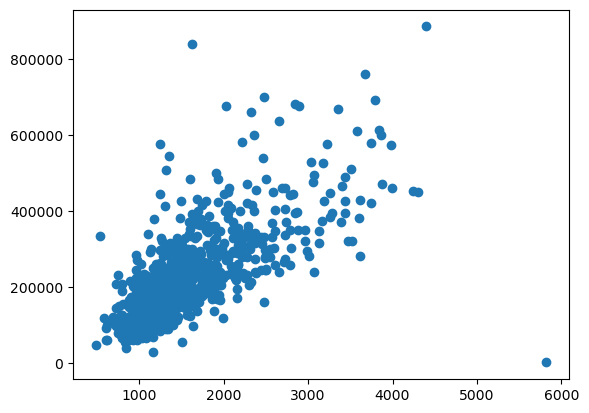

In [37]:
plt.scatter(x=df['sq__ft'], y=df['price'])

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

**The target variable is the variable whose values are modeled and predicted by other variables. A predictor variable is a variable whose values will be used to predict the value of the target variable.**


#### 2.2 List all possible variables which might be Predictor variable.

**The variables i belive that can be used for the prediction are as follows:
1)Beds
2)Bath
3)sq__ft	
4)type**


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [38]:
# ANSWER
my_corr=df[['beds', 'baths', 'sq__ft', 'price']].copy()
my_corr.corr()


,beds,baths,sq__ft,price
beds,1.000000,0.654746,0.695710,0.441988
baths,0.654746,1.000000,0.724631,0.501820
sq__ft,0.695710,0.724631,1.000000,0.693708
price,0.441988,0.501820,0.693708,1.000000


The best predictor i belive is sq__ft because it is having the closest value to 1 having the higher correlation.

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

The easiest way to predict price of a house is by using the mean or the average

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [43]:
# ANSWER
df[['price']]- np.mean(df['price'])

,price
0,-170226.369779
1,-161236.369779
2,-160568.369779
3,-160141.369779
4,-147548.369779
...,...
980,2976.630221
981,4551.630221
982,5551.630221
983,5852.630221


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [45]:
# ANSWER
x = df['sq__ft'].values
y = df['price'].values
print(x)
print(y)

[ 836 1167  796  852  797 1122 1104 1177  941 1146  909 1289  871 1020
 1022 1134  844  795  588 1356 1118 1329 1240 1601  901 1088  963 1119
 1380 1248 1039 1152 1380 1116 1039 1418 1082 1472 1146  760 1304 1207
 1056 1043 1587 1120 1580 1955 1656 1477 1188 1590 1463 1714 1185 1406
 1943 1172 1152 1851 1215 1130 1603 1479 1420 1280 1586 1362 2162 1266
 1715 1820  936 1511 1590 1596 1341 2136 1616 1478 1287 1277 1448 2235
 2093 1193 2163 1269  958 2508 1305 1591 1326 1843 1921 2790 1541 1018
 1672 1380  975 2372 1446 1284 3009 3612 2056 1993 1857 1126 2213 2494
 1843 1520 2800 2309 2367 3516 1914 1690 2725 2354 2185 1801 1961 3134
 1915 2734 2110 3164 3599 2054 1830 1627 3440 2846 2359 2052 3433 3615
 2687 2724 3440 3508 2462 2325  795 1099  840  800  746 1067 1316 1337
  868  924  610 1220  722 1643  722 1080 1039 1051  967 1098 1050 1110
  888 1120 1080  957  952 1211 1264 1080 1266  994 1202  722 1448 1188
 1183 1320 1117 1364 1310 1006 1104  810 1123  904 1156 1321 1392 1439
 1159 

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [64]:
# ANSWER
n=len(x)
sum_x=0
sum_y=0
for i in range(n): 
    sum_x+=abs(x[i]-np.mean(x))
    sum_y+=abs(y[i]-np.mean(y))
b1= (sum_x*sum_y)/(sum_x**2)
print(b1)
     

180.80449849831624


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [53]:
# ANSWER
b0 = np.mean(y) - b1 * np.mean(x)
print(b0)

-58238.01943922567


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [68]:
# ANSWER
yhat= b0 + b1 * x
print(yhat)

[ 92914.54130537 152760.83030831  85682.36136543  95807.41328134
  85863.16586393 144624.62787589 141370.14690292 154568.87529329
 111899.01364769 148963.93583984 106113.26969574 174818.9791251
  99242.69875281 126182.56902906 126544.17802605 146794.28185786
  94360.97729335  85501.55686694  48075.02567778 186932.88052449
 143901.40988189 182051.15906504 165959.55869869 231229.98265658
 104666.83370776 138477.27492694 115876.71261465 144082.21438039
 191272.18848845 167405.99468667 129617.85450052 150048.76283083
 191272.18848845 143539.8008849  129617.85450052 198142.75943139
 137392.44793595 207906.2023503  148963.93583984  79173.39941949
 177531.04660258 159993.01024824 132691.530975   130341.07249452
 228698.7196776  144263.01887889 227433.08818811 295234.77512498
 241174.23007399 208810.22484279 156557.72477677 229241.1331731
 206278.96186381 251660.89098689 156015.31128128 195973.10544941
 293065.121143   153664.8528008  150048.76283083 276431.10728116
 161439.44623623 146071.063

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [69]:
# ANSWER
residuals= abs(y - yhat)
print(residuals)

[3.36925413e+04 8.45488303e+04 1.68023614e+04 2.65004133e+04
 3.96316586e+03 5.47036279e+04 5.04751469e+04 6.35668753e+04
 1.69940136e+04 5.00269358e+04 5.80426970e+03 6.85689791e+04
 7.60930125e+03 1.86805690e+04 1.77941780e+04 3.60942819e+04
 1.89020227e+04 3.07484431e+04 7.19249743e+04 6.53028805e+04
 2.19014099e+04 5.93691591e+04 4.29595587e+04 1.07129983e+05
 2.03331663e+04 1.18372749e+04 1.14042874e+04 1.50822144e+04
 6.00721885e+04 3.54059947e+04 3.38214550e+03 1.54937628e+04
 5.47721885e+04 4.78980088e+03 1.13821455e+04 5.18927594e+04
 9.91555206e+03 5.91562024e+04 6.29064160e+02 7.08266006e+04
 2.55310466e+04 5.99301025e+03 2.42044690e+04 3.09089275e+04
 6.71987197e+04 1.97369811e+04 6.24330882e+04 1.28877775e+05
 7.48172301e+04 4.08102248e+04 1.34422752e+04 5.62411332e+04
 3.20289619e+04 7.73478910e+04 2.24646887e+04 1.72131054e+04
 1.13485121e+05 2.73351472e+04 3.18232372e+04 9.38441073e+04
 2.12765538e+04 3.66789361e+04 4.83915917e+04 2.04308338e+04
 9.50436843e+03 1.887526

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [70]:
# ANSWER
#The total sum of squares:
SStot= (y - np.mean(y))**2
print(SStot)
#The residual sum of squares:
SSres= (y - yhat)**2
print(SSres)

[2.89770170e+10 2.59971669e+10 2.57822014e+10 2.56452583e+10
 2.17705214e+10 1.94678869e+10 1.91970363e+10 1.91673973e+10
 1.81019184e+10 1.70332176e+10 1.66769768e+10 1.51778383e+10
 1.50298699e+10 1.48709171e+10 1.45680965e+10 1.41011753e+10
 1.34990402e+10 1.28138709e+10 1.19789456e+10 1.16248009e+10
 1.15451522e+10 1.13990577e+10 1.13312554e+10 1.10982790e+10
 1.09094619e+10 1.05695609e+10 1.04381714e+10 1.00898750e+10
 9.65274216e+09 9.49618477e+09 9.30228803e+09 9.00475163e+09
 8.63939944e+09 8.22619428e+09 7.82311412e+09 6.92196873e+09
 6.74704035e+09 6.51222688e+09 6.37688008e+09 6.31204346e+09
 5.99824998e+09 5.69245650e+09 5.26384636e+09 4.65101764e+09
 4.61698096e+09 4.28348911e+09 4.15359237e+09 3.98052094e+09
 3.98052094e+09 3.77590215e+09 3.53410867e+09 3.18641845e+09
 3.04686003e+09 3.03990900e+09 2.59777472e+09 2.56931083e+09
 2.48685430e+09 2.34724453e+09 2.26351096e+09 2.19598798e+09
 2.18391439e+09 2.18073774e+09 2.13891171e+09 1.65708995e+09
 1.63607062e+09 1.397366

##### 2.7.F [BONUS] Draw Plot of Predicted Line

<function matplotlib.pyplot.show(close=None, block=None)>

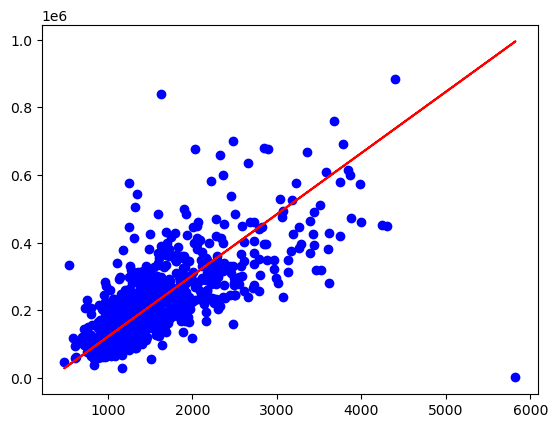

In [72]:
# ANSWER
plt.scatter(x,y,label='y(x)',c='blue')
plt.plot(x, yhat, color='red')
plt.show

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

<function matplotlib.pyplot.show(close=None, block=None)>

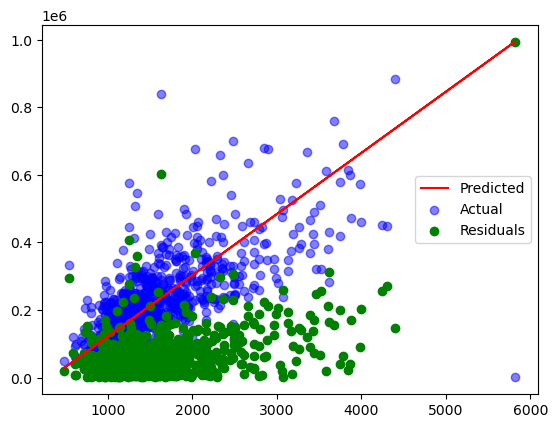

In [74]:
# ANSWER
fig, ax = plt.subplots()
ax.plot(x, yhat, color='red', label='Predicted')
ax.scatter(x,y, color='blue', alpha=0.5, label='Actual')
ax.scatter(x, residuals, color='green', label='Residuals')
ax.legend()
plt.show

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [75]:
# ANSWER
area=1204
price= b0+b1*area
print(price)

159450.59675274708




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



